In [1]:
import FinanceDataReader as fdr
import matplotlib.pyplot as plt
import numpy as np

df_krx=fdr.StockListing('KRX') 
df_krx.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6992 entries, 0 to 6991
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Symbol          6992 non-null   object        
 1   Market          6992 non-null   object        
 2   Name            6992 non-null   object        
 3   Sector          2437 non-null   object        
 4   Industry        2418 non-null   object        
 5   ListingDate     2437 non-null   datetime64[ns]
 6   SettleMonth     2437 non-null   object        
 7   Representative  2437 non-null   object        
 8   HomePage        2257 non-null   object        
 9   Region          2437 non-null   object        
dtypes: datetime64[ns](1), object(9)
memory usage: 600.9+ KB


In [2]:
name=input('주식 코드 기업명:')
df_krx[df_krx['Name'].str.contains(name)]

주식 코드 기업명:쿠쿠


,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
4602,192400,KOSPI,쿠쿠홀딩스,기타 금융업,주방용 전기기기 제조업,2014-08-06,12월,구본학,http://www.cuckoo.co.kr,경상남도
4603,284740,KOSPI,쿠쿠홈시스,개인 및 가정용품 임대업,"정수기, 공기청정기 등",2018-01-11,12월,구본학,"http://www,cuckoo.co.kr",경기도


In [45]:
(df['ma_l'].pct_change() > 0)

Date
2020-03-02    False
2020-03-03    False
2020-03-04    False
2020-03-05    False
2020-03-06    False
              ...  
2021-04-15    False
2021-04-16     True
2021-04-19     True
2021-04-20     True
2021-04-21    False
Name: ma_l, Length: 283, dtype: bool

In [174]:
df = fdr.DataReader('284740','2020-03-01') # 쿠쿠홈시스


def 장기_단기_이평선_수익률(df,ma_s,ma_l):
    # df.pct_change(n)
    # : 인접한 n개 값의 차이를 계산해준다.
    # : 0보다 크다는 것은 n일 전 대비 상승하고 있다.

    #df['return'] = df['Close'].pct_change().fillna(0)
    df = df[['Close']].copy()
    df['ma_s'] = df['Close'].rolling(ma_s).mean()
    df['ma_l'] = df['Close'].rolling(ma_l).mean()
    #df['ma_l_pct'] = df['ma_l'].pct_change()

    # 매매 신호
    # (단기 이평선 > 장기 이평선)일 경우 2 아니면 -2
    cond = df['ma_s'] > df['ma_l'] 
    df['Trading_Signal'] = np.where(cond, 2, -2) 
   #df.iloc[-1, -1] = 0
   #df.tail(30)
    
    # 매수/매도 조건
    매수조건 = (df['Trading_Signal'] == 2) & (df['Trading_Signal'].shift(1) == -2) 
    매도조건 = (df['Trading_Signal'] == -2) & (df['Trading_Signal'].shift(1) == 2)
    
    # 수익률 계산
    수익률 = df.loc[매도조건, 'Close'].reset_index(drop=True) / df.loc[매수조건, 'Close'].reset_index(drop=True)
    return sum(수익률.dropna() - 1)

In [192]:
장기_단기_이평선_수익률(df, 23,21)

0.48751788892811554

In [155]:
print(len(df.loc[매수조건, 'Close']))
df.loc[매수조건, 'Close']

12


Date
2020-04-02    35250
2020-05-07    38450
2020-07-20    37500
2020-09-21    41450
2020-09-29    41500
2020-11-06    41450
2020-12-18    39600
2020-12-30    39100
2021-01-21    40050
2021-03-03    40700
2021-03-16    41500
2021-04-15    43600
Name: Close, dtype: int64

In [156]:
print(len(df.loc[매도조건, 'Close']))
df.loc[매도조건, 'Close']

11


Date
2020-04-27    35050
2020-06-15    34500
2020-09-02    41650
2020-09-22    39300
2020-10-20    40700
2020-11-23    41850
2020-12-28    38900
2021-01-06    38400
2021-02-09    39650
2021-03-11    38950
2021-04-06    41700
Name: Close, dtype: int64

In [167]:
 수익률 = df.loc[매도조건, 'Close'].reset_index(drop=True) / df.loc[매수조건, 'Close'].reset_index(drop=True)

In [171]:
sum(수익률.dropna() - 1)

-0.1429799239650984

In [188]:
from pandas import Series
import pandas as pd

In [190]:
result = []
for i in range(2,31):
    for j in range(20,61):
        print(i,j,장기_단기_이평선_수익률(df,i,j))
        result.append(장기_단기_이평선_수익률(df,i,j))
        
index = pd.MultiIndex.from_product([ range(2, 31), range(20, 61)  ])
s = Series(result, index)


2 20 0.12360678190589613
2 21 -0.043466664245962905
2 22 -0.11399218264493416
2 23 -0.059263313022447583
2 24 -0.04347058186178532
2 25 -0.021061912637749147
2 26 -0.05813361349807378
2 27 -0.16330735654136053
2 28 -0.11596232488272329
2 29 -0.23449428780298098
2 30 -0.23310028204371924
2 31 -0.19450917617988606
2 32 -0.231338745709616
2 33 -0.18600121871973307
2 34 -0.24845322027115102
2 35 -0.2531454700311597
2 36 -0.20250771380835175
2 37 -0.19820000480047628
2 38 -0.26360194919924285
2 39 -0.2383231085251405
2 40 -0.25112480387365166
2 41 -0.19726824893790085
2 42 -0.1887816457278848
2 43 -0.13183493635282917
2 44 -0.19078181426522434
2 45 -0.22594506594343056
2 46 -0.22355213705948962
2 47 -0.41563546434086374
2 48 -0.38182469671454466
2 49 -0.37885684971359046
2 50 -0.30528988520799694
2 51 -0.33833410747554715
2 52 -0.3293088094790556
2 53 -0.31506895982488636
2 54 -0.32822753890638634
2 55 -0.33271268500373297
2 56 -0.30889798412049185
2 57 -0.31380468567925857
2 58 -0.34205634

9 56 -0.20362064369281518
9 57 -0.210436017881782
9 58 -0.1835048313761274
9 59 -0.19392364713845467
9 60 -0.19620661945862616
10 20 -0.10191812589791538
10 21 -0.16333708948846837
10 22 -0.1174341111611319
10 23 -0.1696497128977743
10 24 -0.15660921113191428
10 25 -0.14520236702545042
10 26 -0.09094616760252505
10 27 -0.2018961845214029
10 28 -0.21259903375225553
10 29 -0.18548405314723404
10 30 -0.1627244983652626
10 31 -0.14796407079006757
10 32 -0.16190066074570097
10 33 -0.15359985803510434
10 34 -0.1831899818707986
10 35 -0.2234045730119727
10 36 -0.19931736013239276
10 37 -0.2193674564931294
10 38 -0.20374876101621953
10 39 -0.16166308090719472
10 40 -0.14240742594744127
10 41 -0.1155564630144208
10 42 -0.02221105349490471
10 43 -0.06613381577744426
10 44 -0.11895313772392613
10 45 -0.1129647761909155
10 46 -0.10158850428431054
10 47 -0.1566707274824758
10 48 -0.1490969540598106
10 49 -0.11935426613572686
10 50 -0.09025607484381037
10 51 -0.1009434714725077
10 52 -0.202863005386

17 43 -0.03243620706522399
17 44 -0.04123490708445432
17 45 -0.08852822928464521
17 46 -0.15168250459499366
17 47 -0.22910292452868986
17 48 -0.217334242180375
17 49 -0.18687486298101208
17 50 -0.19253474860927677
17 51 -0.2195804814193466
17 52 -0.21564882636261806
17 53 -0.20036311849947008
17 54 -0.2133309935363107
17 55 -0.20077334113626666
17 56 -0.17747311195368454
17 57 -0.2051952429310775
17 58 -0.20346965361449143
17 59 -0.20193177041436527
17 60 -0.21857893021643637
18 20 0.026708018502437314
18 21 -0.010174468419266058
18 22 -0.06445456277077488
18 23 0.00222425698352402
18 24 0.11145303537476547
18 25 0.007869175514278681
18 26 0.008325407950185992
18 27 0.016321679343445306
18 28 -0.06680252060898151
18 29 -0.10300768009475236
18 30 -0.18801010000903773
18 31 -0.10909103636944362
18 32 -0.13088134695482256
18 33 -0.0531942560853258
18 34 -0.04838963585238509
18 35 -0.039266267270484545
18 36 0.0224246890899944
18 37 -0.0358007997668498
18 38 -0.08256788507385615
18 39 -0.0

25 36 0.22780203678452482
25 37 0.2110598996172688
25 38 0.13694060042409117
25 39 0.16326761058177763
25 40 0.05449567477702533
25 41 0.05500010711534942
25 42 0.03739211949938481
25 43 0.08188830630984956
25 44 0.055258000951471375
25 45 0.017131068308551267
25 46 -0.06530268102133219
25 47 -0.1644851041755947
25 48 -0.09545123812300271
25 49 -0.16103195239730594
25 50 -0.2008570516706828
25 51 -0.2572041368397784
25 52 -0.2682494780737318
25 53 -0.220042479624161
25 54 -0.222304755804263
25 55 -0.26739266665898864
25 56 -0.24642678925832306
25 57 -0.2116572673673418
25 58 -0.24202656270410683
25 59 -0.2655973512370091
25 60 -0.2894506833987699
26 20 0.25927636975317314
26 21 0.1933416236773683
26 22 0.12628391879372303
26 23 -0.05239947912977949
26 24 0.04284110870173452
26 25 0.07964219818354756
26 26 0
26 27 0.22607140246881607
26 28 0.31289278362025386
26 29 0.19658331927116912
26 30 0.19018078209090783
26 31 0.1139157430559622
26 32 0.11138439215126938
26 33 0.0940915496437904
2

In [191]:
from pandas import Series
import pandas as pd
print(s.idxmax())
print(s.max())

(23, 21)
0.48751788892811554


<IPython.core.display.Javascript object>


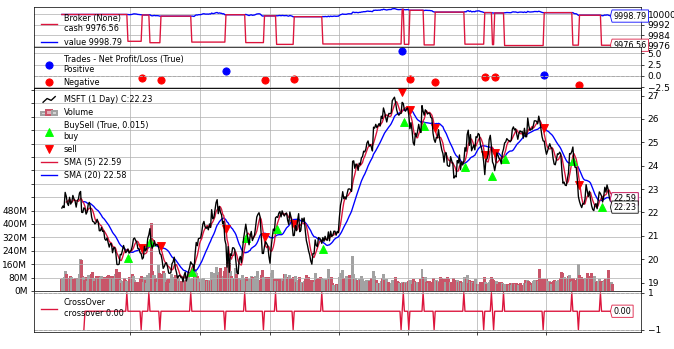

[[<Figure size 432x288 with 5 Axes>]]

In [193]:
from datetime import datetime 
import backtrader as bt 

# Create a subclass of Strategy to define the indicators and logic 

class SmaCross(bt.Strategy):
    # list of parameters which are configurable for the strategy 
    params = dict( 
        pfast=5, # period for the fast moving average 
        pslow=20 # period for the slow moving average 
    ) 
    
    def __init__(self): 
        sma1 = bt.ind.SMA(period=self.p.pfast) # fast moving average 
        sma2 = bt.ind.SMA(period=self.p.pslow) # slow moving average 
        self.crossover = bt.ind.CrossOver(sma1, sma2) # crossover signal 
        
    def next(self): 
        if not self.position: # not in the market 
            if self.crossover > 0: # if fast crosses slow to the upside 
                self.buy() # enter long 
                
        elif self.crossover < 0: # in the market & cross to the downside 
            self.close() # close long position 
            
cerebro = bt.Cerebro() # create a "Cerebro" engine instance 

# Create a data feed 
data = bt.feeds.YahooFinanceData(dataname='MSFT', 
                                 fromdate=datetime(2011, 1, 1), 
                                 todate=datetime(2012, 12, 31))

cerebro.adddata(data) # Add the data feed 

cerebro.addstrategy(SmaCross) # Add the trading strategy 
cerebro.run() # run it all 
cerebro.plot() # and plot it with a single command



In [202]:
bt.feeds.YahooFinanceData(dataname='MSFT', 
                                 fromdate=datetime(2011, 1, 1), 
                                 todate=datetime(2012, 12, 31))